## (05PND)Assignment - Working with Pandas ##

In this assignment, you are given a csv file to analyze the tip data. Download the tips.csv file and store it in the same folder of your notebook file.  To complete this assignment, you goto each question and answer it in the code cell after it. You can add more code cell as necessary. Run your code after you finish the question to make sure there is no error before moving on to next question. Check your output with the output image provided in the question.

1. Download file PNDAssignmentTemplate.ipynb
1. Rename your file as PNDLastFirst.ipynb where Last is your last name and First is your first name
1. Download dataset tips.csv from this page. Make sure to save the csv file side by side with your notebook file.
1. Complete the following 15 questions.  When completing each questoin, run your code.  You may add extra code cell for your answer
1. Compare your result with the output image provided in the question
1. Submit your ipynb file and a screenshot of your repository showing that you have pushed the inpynb file to your repository**

**Q1. Import Numpy module as np and Pandas module as pd**

In [1]:
import numpy as np
import pandas as pd

**Q2. Load the tips.csv file into Pandas DataFrame object named tips_df, and display the first 5 rows.  See Output below:**

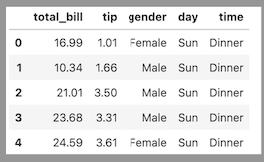

In [37]:
tips_df = pd.read_csv('tips.csv')
print(tips_df.head())

   total_bill   tip  gender  day    time
0       16.99  1.01  Female  Sun  Dinner
1       10.34  1.66    Male  Sun  Dinner
2       21.01  3.50    Male  Sun  Dinner
3       23.68  3.31    Male  Sun  Dinner
4       24.59  3.61  Female  Sun  Dinner


**Q3. Display total row counts and column counts of tips_df. See Output below:**

(244, 5)

In [39]:
print(tips_df.shape)

(244, 5)


**Q4. Add a calculated column named tip_percent; tip_percent is calculated using tip divided by total_bill.  See Output below:**

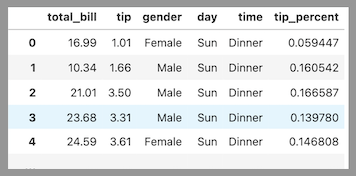

In [41]:
tips_df['tip_percent'] = tips_df['tip'] / tips_df['total_bill']
print(tips_df.head())

   total_bill   tip  gender  day    time  tip_percent
0       16.99  1.01  Female  Sun  Dinner     0.059447
1       10.34  1.66    Male  Sun  Dinner     0.160542
2       21.01  3.50    Male  Sun  Dinner     0.166587
3       23.68  3.31    Male  Sun  Dinner     0.139780
4       24.59  3.61  Female  Sun  Dinner     0.146808


**Q5. Display total tips and bill amount by gender of the servers.  See Output below:**

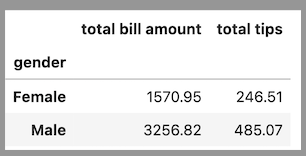

In [65]:
tipByGender = tips_df.groupby('gender')
columns = tipByGender[['total_bill','tip']]
summation = columns.sum()
result = summation.reset_index()
print(result)

   gender  total_bill     tip
0  Female     1570.95  246.51
1    Male     3256.82  485.07


**Q6. Count tips_df for tip_percent is 20% or more by day of the week.  See Output below:**

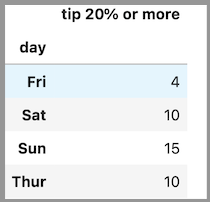

In [69]:
tipsGreaterThan20 = tips_df[tips_df['tip_percent'] >= 0.2]
tipsByDay = tipsGreaterThan20.groupby('day')
tipCount = tipsByDay.size()
result = tipCount.reset_index()
print(result)


    day   0
0   Fri   4
1   Sat  10
2   Sun  15
3  Thur  10


**Q7. Display the average of tip by day of the week(column), gender of the servers(index) - using pivot table.  See Output below:**

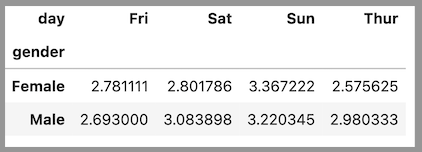

In [73]:
pivotTable = tips_df.pivot_table(
    index = 'gender',
    columns = 'day',
    values = 'tip',
    aggfunc = 'mean'
)

print(pivotTable)
    

day          Fri       Sat       Sun      Thur
gender                                        
Female  2.781111  2.801786  3.367222  2.575625
Male    2.693000  3.083898  3.220345  2.980333


**Q8. Display tips of more than 5 dollars at Sundays' dinners.  See Output below:**

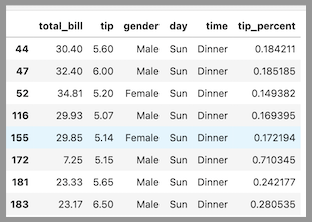

In [79]:
tipFilter = tips_df[tips_df['tip']>5]
sundayFilter = tipFilter[tipFilter['day'] == 'Sun']
sundayTips = sundayFilter[sundayFilter['time'] == 'Dinner']

print(sundayTips)

     total_bill   tip  gender  day    time  tip_percent
44        30.40  5.60    Male  Sun  Dinner     0.184211
47        32.40  6.00    Male  Sun  Dinner     0.185185
52        34.81  5.20  Female  Sun  Dinner     0.149382
116       29.93  5.07    Male  Sun  Dinner     0.169395
155       29.85  5.14  Female  Sun  Dinner     0.172194
172        7.25  5.15    Male  Sun  Dinner     0.710345
181       23.33  5.65    Male  Sun  Dinner     0.242177
183       23.17  6.50    Male  Sun  Dinner     0.280535


**Q9. Display count of each gender of servers by time and day of the week.  See Output below:**

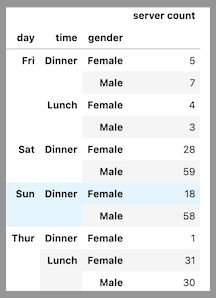

In [83]:
pivotTable = tips_df.pivot_table(
    index = ['day', 'time'],
    columns = 'gender',
    values = 'tip',
    aggfunc = 'count'
)

pivotTable.columns.name = 'server count'

print(pivotTable)

server count  Female  Male
day  time                 
Fri  Dinner      5.0   7.0
     Lunch       4.0   3.0
Sat  Dinner     28.0  59.0
Sun  Dinner     18.0  58.0
Thur Dinner      1.0   NaN
     Lunch      31.0  30.0


**Q10. Get a sample of 50 rows and save it to a new csv file named tips_samples.csv**

In [89]:
outputFile = tips_df.sample(n=50)
outputFile.to_csv('tips_samples.csv', index = False)

**The following 5 questions are working with groupby, merge and join. Here are the two DataFrame objects we will be using:**

In [ ]:
import pandas as pd
invoice_df = pd.DataFrame({'invoice_no':[1001,1002,1003,1004,1005,1006,1007,1008,1009,1010],
                           'amount':[250.0, 321.0,115.5,623.5,500.0,435.0,345.0,875.0,53.6,700.5],
                           'customer':['Sonic','Blaze','Fearless','Dill','Urban','Lapton','Urban','JellySmith','Blaze','Fearless'],
                           'date':['2023-3-25','2022-5-3','2022-8-6','2022-11-15','2022-1-23','2023-7-10','2023-12-10','2023-2-5','2023-10-23','2022-3-16']
                          })
company_df = pd.DataFrame({'customer':['Sonic','Blaze','Beam','Stream','Fearless','Dill','BMC','Lapton','Urban','Synegy','JellySmith','Box','Jump','Savvy'],
                           'city': ['Houston','Austin','Chicago','Reno','Austin','Tucson','Los Angeles','Reno','Tucson','Houston','Austin','Atlanta','Miami','Atlanta']
                          })

**Q11. Merge company_df and invoice_df using inner join and display invoice sorting by city, customer and invoice date in ascending order.  See Output below:**

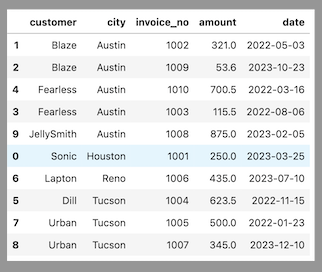

In [101]:
import pandas as pd
invoice_df = pd.DataFrame({'invoice_no':[1001,1002,1003,1004,1005,1006,1007,1008,1009,1010],
                           'amount':[250.0, 321.0,115.5,623.5,500.0,435.0,345.0,875.0,53.6,700.5],
                           'customer':['Sonic','Blaze','Fearless','Dill','Urban','Lapton','Urban','JellySmith','Blaze','Fearless'],
                           'date':['2023-3-25','2022-5-3','2022-8-6','2022-11-15','2022-1-23','2023-7-10','2023-12-10','2023-2-5','2023-10-23','2022-3-16']
                          })
company_df = pd.DataFrame({'customer':['Sonic','Blaze','Beam','Stream','Fearless','Dill','BMC','Lapton','Urban','Synegy','JellySmith','Box','Jump','Savvy'],
                           'city': ['Houston','Austin','Chicago','Reno','Austin','Tucson','Los Angeles','Reno','Tucson','Houston','Austin','Atlanta','Miami','Atlanta']
                          })

mergedDF = pd.merge(company_df, invoice_df, on='customer', how='inner')
mergedDF['date'] = pd.to_datetime(mergedDF['date'])

sortDF = companyDF.sort_values(by=['city', 'customer', 'date'])

print(sortDF)


     customer     city  invoice_no  amount       date
1       Blaze   Austin        1002   321.0 2022-05-03
2       Blaze   Austin        1009    53.6 2023-10-23
4    Fearless   Austin        1010   700.5 2022-03-16
3    Fearless   Austin        1003   115.5 2022-08-06
9  JellySmith   Austin        1008   875.0 2023-02-05
0       Sonic  Houston        1001   250.0 2023-03-25
6      Lapton     Reno        1006   435.0 2023-07-10
5        Dill   Tucson        1004   623.5 2022-11-15
7       Urban   Tucson        1005   500.0 2022-01-23
8       Urban   Tucson        1007   345.0 2023-12-10


**Q12. Display each customer with its total invoice count. See Output below:**

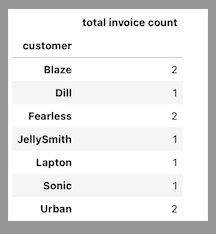

In [103]:
customerGroup = invoice_df.groupby('customer')
countInvoice = customerGroup['invoice_no'].count()
countInvoiceDF = countInvoice.reset_index(name = 'total invoice count')

countInvoiceDF.set_index('customer', inplace = True)

print(countInvoiceDF)

            total invoice count
customer                       
Blaze                         2
Dill                          1
Fearless                      2
JellySmith                    1
Lapton                        1
Sonic                         1
Urban                         2


**Q13. Display total invoice amount by city and customer. See Output below:**

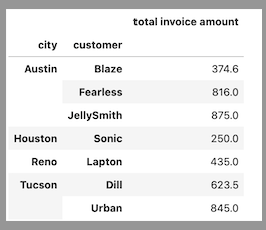

In [105]:
margedDF = pd.merge(company_df, invoice_df, on = 'customer', how = 'inner')
groupMerge = mergedDF.groupby(['city', 'customer'])
total = groupMerge['amount'].sum()
totalDF = total.reset_index(name = 'total invoice amount')
totalDF.set_index(['city', 'customer'], inplace = True)
print(totalDF)

                    total invoice amount
city    customer                        
Austin  Blaze                      374.6
        Fearless                   816.0
        JellySmith                 875.0
Houston Sonic                      250.0
Reno    Lapton                     435.0
Tucson  Dill                       623.5
        Urban                      845.0


**Q14. Display customer that never places order before. See Output below:**

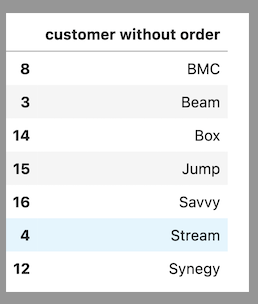

**Q15. Display total invoice count and total invoice amount for each year (2022, 2023). See Output below:**

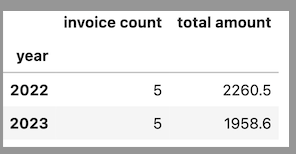

In [120]:
invoice_df['date'] = pd.to_datetime(invoice_df['date'])
invoice_df['year'] = invoice_df['date'].dt.year
year = invoice_df.groupby('year')

total = year.agg(
    invoice_count = ('invoice_no', 'count'),
    total_amount = ('amount', 'sum')
)

print(total)

      invoice_count  total_amount
year                             
2022              5        2260.5
2023              5        1958.6
